In [1]:
using Pkg; Pkg.activate("PrrtyEnv")

  Activating project at `~/dev/nbs/PrrtyEnv`


In [2]:
Pkg.status()

      Status `~/dev/nbs/PrrtyEnv/Project.toml`
  [a47e2ad8] Toolips v0.2.4 `https://github.com/ChifiSource/Toolips.jl.git#Unstable`
  [8ae86ec9] ToolipsSVG v0.1.0 `https://github.com/ChifiSource/ToolipsSVG.jl#unstable`
  [2fe55384] ToolipsSession v0.3.0


In [3]:
using Toolips

In [4]:
using ToolipsSession

In [5]:
using ToolipsSVG

In [6]:
using Random

In [65]:
import Base: show

In [7]:
abstract type AbstractContext <: Toolips.Modifier end

In [66]:
function show(io::IO, con::AbstractContext)
    display(MIME"text/html"(), con.window)
end

show (generic function with 400 methods)

In [67]:
mutable struct Context <: AbstractContext
    window::Component{:svg}
    uuid::String
    layers::Dict{String, UnitRange{Int64}}
    dim::Pair{Int64, Int64}
    margin::Pair{Int64, Int64}
    Context(wind::Component{:svg}, margin::Pair{Int64, Int64}) = begin
        new(wind, randstring(), Dict{String, UnitRange{Int64}}(), wind[:width] => wind[:height], 
            margin)::Context
    end
    Context(width::Int64 = 1280, height::Int64 = 720,
        margin::Pair{Int64, Int64} = 0 => 0) = begin
        window::Component{:svg} = svg("window", width = width,
        height = height)
        Context(window, margin)::Context
    end
end

In [68]:
c = Context(500, 500)

" "

In [69]:
function draw!(c::AbstractContext, comps::Vector{<:Servable}, id::String = randstring())
    current_len::Int64 = length(c.window[:children])
    comp_len::Int64 = length(comps)
    c.window[:children] = Vector{Servable}(vcat(c.window[:children], comps))
    push!(c.layers, id => current_len + 1:current_len + comp_len)
end

draw! (generic function with 2 methods)

In [70]:
function line!(con::AbstractContext, x::Vector{<:Number}, y::Vector{<:Number},
        styles::Pair{String, <:Any} ...)
    if length(styles) == 0
        styles = ("fill" => "none", "stroke" => "black", "stroke-width" => "4")
    end
    if length(x) != length(y)
        throw(DimensionMismatch("x and y, of lengths $(length(x)) and $(length(y)) are not equal!"))
    end
    xmax::Number, ymax::Number = maximum(x), maximum(y)
    percvec_x = map(n::Number -> n / xmax, x)
    percvec_y = map(n::Number -> n / ymax, y)
    line_data = join(Tuple(begin
                    scaled_x::Int64 = round(con.dim[1] * xper)  + con.margin[1]
                    scaled_y::Int64 = con.dim[2] - round(con.dim[2] * yper)  + con.margin[2]
                    "$(scaled_x)&#32;$(scaled_y),"
                end for (xper, yper) in zip(percvec_x, percvec_y)))
    line_comp = ToolipsSVG.polyline("newline", points = line_data)
    style!(line_comp, styles ...)
    draw!(con, [line_comp])
end

line! (generic function with 2 methods)

In [71]:
line!(c, [25, 22, 15], [15, 34, 55])

Dict{String, UnitRange{Int64}} with 1 entry:
  "MPMC9228" => 1:1

In [72]:
display(c.window)

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline")], :height => 500, :width => 500), Servable[]), Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline")], :height => 500, :width => 500), Servable[], "svg")

In [73]:
line!(c, [35, 92, 22], [125, 92, 27], "stroke-width" => "5", "fill" => "none", "stroke" => "blue")

Dict{String, UnitRange{Int64}} with 2 entries:
  "IwiieGKM" => 2:2
  "MPMC9228" => 1:1

In [74]:
display(c.window)

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[], "polyline")], :height => 500, :width => 500), Servable[]), Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[], "polyline")], :height => 500, :width => 500), Servable[], "svg")

In [75]:
c.layers

Dict{String, UnitRange{Int64}} with 2 entries:
  "IwiieGKM" => 2:2
  "MPMC9228" => 1:1

In [76]:
c.window[:children][1]

Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline")

In [77]:
line!(c, [5, 1, 2], [7, 34, 5], "stroke" => "red", "stroke-width" => "10", "fill" => "none")

Dict{String, UnitRange{Int64}} with 3 entries:
  "fbAp3CjI" => 3:3
  "IwiieGKM" => 2:2
  "MPMC9228" => 1:1

In [78]:
display(c.window)

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[], "polyline")], :height => 500, :width => 500), Servable[]), Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[], "polyline")], :height => 500, :width => 500), Servable[], "svg")

In [79]:
g(name::String, styles::Pair{String, String} ...; args ...) = begin
    comp::Component{:g} = Component(name, "g", args ...)
    if length(styles) != 0
        style!(comp, styles ...)
    end
    comp::Component{:g}
end

g (generic function with 1 method)

In [80]:
mutable struct Group <: AbstractContext
    window::Component{:g}
    uuid::String
    layers::Dict{String, UnitRange{Int64}}
    dim::Pair{Int64, Int64}
    margin::Pair{Int64, Int64}
    Group(name::String = randstring(), width::Int64 = 1280, height::Int64 = 720,
        margin::Pair{Int64, Int64} = 0 => 0) = begin
        window::Component{:g} = g("$name", width = width, height = height)
        new(window, name, Dict{String, UnitRange{Int64}}(), width => height, margin)
    end
end

In [81]:
function group!(f::Function, c::Context, name::String, w::Int64 = c.dim[1], 
    h::Int64 = c.dim[2], margin::Pair{Int64, Int64} = c.margin)
    gr = Group(name, w, h, margin)
    f(gr)
    draw!(c, [gr.window], name)
end

group! (generic function with 4 methods)

In [82]:
group!(c, "exampline", 50, 50, 10 => 10) do g::Group
    line!(g, [5, 10, 11], [9, 4, 3], "stroke" => "green", "stroke-width" => "10", "fill" => "none")
end

Dict{String, UnitRange{Int64}} with 4 entries:
  "fbAp3CjI"  => 3:3
  "IwiieGKM"  => 2:2
  "exampline" => 4:4
  "MPMC9228"  => 1:1

In [83]:
display(c.window)

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[], "polyline"), Component{:g}("exampline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("exampline", "g", Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: green;stroke-width: 10;fill: none;'", :points => "33&#32;10,55&#32;38,60&#32;43,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke: green;stroke-width: 10;fill: none;'", :points => "33&#32;10,55&#32;38,60&#32;43,"), Servable[], "polyline")], :height => 50, :width => 50), Servable[]), Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: green;stroke-width: 10;fill: none;'", :points => "33&#32;10,55&#32;38,60&#32;43,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke: green;stroke-width: 10;fill: none;'", :points => "33&#32;10,55&#32;38,60&#32;43,"), Servable[], "polyline")], :height => 50, :width => 50), Servable[], "g")], :height => 500, :width => 500), Servable[]), Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[]), Dict{Any, Any}(

In [84]:
function line!(con::AbstractContext, first::Pair{<:Number, <:Number},
    second::Pair{<:Number, <:Number}, styles::Pair{String, <:Any} ...)
    if length(styles) == 0
        styles = ("fill" => "none", "stroke" => "black", "stroke-width" => "4")
    end
    ln = ToolipsSVG.line(randstring(), x1 = first[1], y1 = first[2],
    x2 = second[1], y2 = second[2])
    style!(ln, styles ...)
    draw!(con, [ln])
end

line! (generic function with 2 methods)

In [85]:
line!(c, 5 => 5, 200 => 200)

Dict{String, UnitRange{Int64}} with 5 entries:
  "fbAp3CjI"  => 3:3
  "IwiieGKM"  => 2:2
  "exampline" => 4:4
  "YdLplePe"  => 5:5
  "MPMC9228"  => 1:1

In [86]:
c.window

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke: red;stroke-width: 10;fill: none;'", :points => "500&#32;397,100&#32;0,200&#32;426,"), Servable[], "polyline"), Component{:g}("exampline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("exampline", "g", Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: green;stroke-width: 10;fill: none;'", :points => "33&#32;10,55&#32;38,60&#32;43,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke: green;stroke-width: 10;fill: none;'", :points => "33&#32;10,55&#32;38,60&#32;43,"), Servable[], "polyline")], :height => 50, :width => 50), Servable[]), Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke: green;stroke-width: 10;fill: none;'", :points => "33&#32;10,55&#32;38,60&#32;43,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'stroke: green;stroke-width: 10;fill: none;'", :points => "33&#32;10,55&#32;38,60&#32;43,"), Servable[], "polyline")], :height => 50, :width => 50), Servable[], "g"), Component{:line}("a8B8PaJN", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("a8B8PaJN", "line", Dict{Any, Any}(:children => Servable[], :y1 => 5, :x2 => 200, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 200, :x1 => 5), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 5, :x2 => 200, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 200, :x1 => 5), Servable[], "line")], :height => 500, :width => 500), Servable[]), Dict{Any, Any}(:children => Servable[Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[]), Dict{Any, Any}(:children => Servable[], "style" => "'fill: none;stroke: black;stroke-width: 4;'", :points => "500&#32;364,440&#32;191,300&#32;0,"), Servable[], "polyline"), Component{:polyline}("newline", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("newline", "polyline", Dict{Any, Any}(:children => Servable[], "style" => "'stroke-width: 5;fill: none;stroke: blue;'", :points => "190&#32;0,500&#32;132,120&#32;392,"), Servable[]), Dict{Any, Any}(:children => Serva

In [87]:
c = Context()

" "

In [88]:
line!(c, 5 => 5, 200 => 200)

Dict{String, UnitRange{Int64}} with 1 entry:
  "rlKg2mg8" => 1:1

In [89]:
display(c.window)

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:line}("Vs2yaubu", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("Vs2yaubu", "line", Dict{Any, Any}(:children => Servable[], :y1 => 5, :x2 => 200, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 200, :x1 => 5), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 5, :x2 => 200, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 200, :x1 => 5), Servable[], "line")], :height => 720, :width => 1280), Servable[]), Dict{Any, Any}(:children => Servable[Component{:line}("Vs2yaubu", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("Vs2yaubu", "line", Dict{Any, Any}(:children => Servable[], :y1 => 5, :x2 => 200, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 200, :x1 => 5), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 5, :x2 => 200, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 200, :x1 => 5), Servable[], "line")], :height => 720, :width => 1280), Servable[], "svg")

In [90]:
plt = Context(500, 500)

" "

In [91]:
function axes!(con::AbstractContext, styles::Pair{String, <:Any} ...)
    if length(styles) == 0
        styles = ("fill" => "none", "stroke" => "black", "stroke-width" => "4")
    end
    line!(con, con.margin[1] => con.dim[2] + con.margin[2], con.dim[1] + con.margin[1] => con.dim[2] + con.margin[2], styles ...)
    line!(con, con.margin[1] => con.margin[2], con.margin[1] => con.dim[2] + con.margin[2], styles ...)
end

axes! (generic function with 1 method)

In [92]:
display(plt.window)

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[], :height => 500, :width => 500), Servable[]), Dict{Any, Any}(:children => Servable[], :height => 500, :width => 500), Servable[], "svg")

In [93]:
plt.window[:children]

Servable[]

In [94]:
function grid!(con::AbstractContext, n::Int64 = 4, styles::Pair{String, <:Any} ...)
    if length(styles) == 0
        styles = ("fill" => "none", "stroke" => "lightblue", "stroke-width" => "1", "opacity" => 80percent)
    end
    mx = con.margin[1]
    my = con.margin[2]
    division_amountx::Int64 = round((con.dim[1]) / n)
    division_amounty::Int64 = round((con.dim[2]) / n)
    [begin
        line!(con, xcoord + mx => 0 + my, xcoord + mx => con.dim[2] + my, styles ...)
        line!(con, 0 + mx => ycoord + my, con.dim[1] + mx => ycoord + my, styles ...)
    end for (xcoord, ycoord) in zip(
    range(1, con.dim[1],
    step = division_amountx), range(1, con.dim[2], step = division_amounty))]
end

grid! (generic function with 2 methods)

In [95]:
axes!(plt)

Dict{String, UnitRange{Int64}} with 2 entries:
  "HxkQtfRE" => 2:2
  "fibB9A8W" => 1:1

In [96]:
grid!(plt, 4)

4-element Vector{Dict{String, UnitRange{Int64}}}:
 Dict("bMujq95v" => 4:4, "HxkQtfRE" => 2:2, "EIGEaIJm" => 8:8, "i99NM3v0" => 7:7, "fSnAuD38" => 6:6, "HqUnMVYq" => 5:5, "Gg13Wumd" => 10:10, "gy8GXxO0" => 9:9, "fibB9A8W" => 1:1, "vOCJ646A" => 3:3…)
 Dict("bMujq95v" => 4:4, "HxkQtfRE" => 2:2, "EIGEaIJm" => 8:8, "i99NM3v0" => 7:7, "fSnAuD38" => 6:6, "HqUnMVYq" => 5:5, "Gg13Wumd" => 10:10, "gy8GXxO0" => 9:9, "fibB9A8W" => 1:1, "vOCJ646A" => 3:3…)
 Dict("bMujq95v" => 4:4, "HxkQtfRE" => 2:2, "EIGEaIJm" => 8:8, "i99NM3v0" => 7:7, "fSnAuD38" => 6:6, "HqUnMVYq" => 5:5, "Gg13Wumd" => 10:10, "gy8GXxO0" => 9:9, "fibB9A8W" => 1:1, "vOCJ646A" => 3:3…)
 Dict("bMujq95v" => 4:4, "HxkQtfRE" => 2:2, "EIGEaIJm" => 8:8, "i99NM3v0" => 7:7, "fSnAuD38" => 6:6, "HqUnMVYq" => 5:5, "Gg13Wumd" => 10:10, "gy8GXxO0" => 9:9, "fibB9A8W" => 1:1, "vOCJ646A" => 3:3…)

In [97]:
display(plt.window)

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:line}("7OVOiwNc", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("7OVOiwNc", "line", Dict{Any, Any}(:children => Servable[], :y1 => 500, :x2 => 500, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 500, :x2 => 500, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[], "line"), Component{:line}("0RkK1Amg", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("0RkK1Amg", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 0, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 0, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[], "line"), Component{:line}("aMQzsHot", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("aMQzsHot", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 1, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 1), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 1, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 1), Servable[], "line"), Component{:line}("lZjxXlri", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("lZjxXlri", "line", Dict{Any, Any}(:children => Servable[], :y1 => 1, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 1, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 1, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 1, :x1 => 0), Servable[], "line"), Component{:line}("rXhTexZU", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("rXhTexZU", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 126, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 126), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 126, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 126), Servable[], "line"), Component{:line}("ZfD79c1A", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("ZfD79c1A", "line", Dict{Any, Any}(:children => Servable[], :y1 => 126, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 126, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 126, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 126, :x1 => 0), Servable[], "line"), Component{:line}("SVkAgy0B", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("SVkAgy0B", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 251, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 251), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 251, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 251), Servable[], "line"), Component{:line}("LnCzd0dZ", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("LnCzd0dZ", "line", Dict{Any, Any}(:children => Servable[], :y1 => 251, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 251, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 251, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 251, :x1 => 0), Servable[], "line"), Component{:line}("OgYwvBif", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("OgYwvBif", "line", Dict{Any, Any}(:c

In [98]:
axes!(plt)

Dict{String, UnitRange{Int64}} with 12 entries:
  "HxkQtfRE" => 2:2
  "fSnAuD38" => 6:6
  "gy8GXxO0" => 9:9
  "bMujq95v" => 4:4
  "i99NM3v0" => 7:7
  "HqUnMVYq" => 5:5
  "FwGeNiHv" => 12:12
  "EIGEaIJm" => 8:8
  "a3YKqq5L" => 11:11
  "Gg13Wumd" => 10:10
  "fibB9A8W" => 1:1
  "vOCJ646A" => 3:3

In [99]:
display(plt.window)

Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:line}("7OVOiwNc", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("7OVOiwNc", "line", Dict{Any, Any}(:children => Servable[], :y1 => 500, :x2 => 500, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 500, :x2 => 500, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[], "line"), Component{:line}("0RkK1Amg", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("0RkK1Amg", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 0, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 0, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[], "line"), Component{:line}("aMQzsHot", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("aMQzsHot", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 1, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 1), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 1, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 1), Servable[], "line"), Component{:line}("lZjxXlri", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("lZjxXlri", "line", Dict{Any, Any}(:children => Servable[], :y1 => 1, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 1, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 1, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 1, :x1 => 0), Servable[], "line"), Component{:line}("rXhTexZU", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("rXhTexZU", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 126, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 126), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 126, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 126), Servable[], "line"), Component{:line}("ZfD79c1A", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("ZfD79c1A", "line", Dict{Any, Any}(:children => Servable[], :y1 => 126, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 126, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 126, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 126, :x1 => 0), Servable[], "line"), Component{:line}("SVkAgy0B", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("SVkAgy0B", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 251, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 251), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 251, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 500, :x1 => 251), Servable[], "line"), Component{:line}("LnCzd0dZ", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("LnCzd0dZ", "line", Dict{Any, Any}(:children => Servable[], :y1 => 251, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 251, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 251, :x2 => 500, "style" => "'fill: none;stroke: lightblue;stroke-width: 1;opacity: 80%;'", :y2 => 251, :x1 => 0), Servable[], "line"), Component{:line}("OgYwvBif", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("OgYwvBif", "line", Dict{Any, Any}(:c

In [100]:
function points!(con::AbstractContext, x::Vector{<:Number}, y::Vector{<:Number},
     styles::Pair{String, <:Any} ...)
    if length(styles) == 0
        styles = ("fill" => "orange", "stroke" => "lightblue", "stroke-width" => "0")
    end
    xmax::Number, ymax::Number = maximum(x), maximum(y)
     percvec_x = map(n::Number -> n / xmax, x)
     percvec_y = map(n::Number -> n / ymax, y)
    [begin
        c = circle(randstring(), cx = string(pointx * con.dim[1] + con.margin[1]), 
                cy = string(con.dim[2] - (pointy * con.dim[2] + con.margin[2])), r = "5")
            style!(c, styles ...)
            draw!(con, [c])
        end for (pointx, pointy) in zip(percvec_x, percvec_y)]
end

points! (generic function with 1 method)

In [101]:
points!(plt, [5, 10, 15, 20], [11, 18, 15, 12])

4-element Vector{Dict{String, UnitRange{Int64}}}:
 Dict("HxkQtfRE" => 2:2, "fSnAuD38" => 6:6, "7fAlIdgT" => 14:14, "gy8GXxO0" => 9:9, "7vXwcXe4" => 16:16, "bMujq95v" => 4:4, "Fym6Erp2" => 13:13, "i99NM3v0" => 7:7, "2jovjUdm" => 15:15, "HqUnMVYq" => 5:5…)
 Dict("HxkQtfRE" => 2:2, "fSnAuD38" => 6:6, "7fAlIdgT" => 14:14, "gy8GXxO0" => 9:9, "7vXwcXe4" => 16:16, "bMujq95v" => 4:4, "Fym6Erp2" => 13:13, "i99NM3v0" => 7:7, "2jovjUdm" => 15:15, "HqUnMVYq" => 5:5…)
 Dict("HxkQtfRE" => 2:2, "fSnAuD38" => 6:6, "7fAlIdgT" => 14:14, "gy8GXxO0" => 9:9, "7vXwcXe4" => 16:16, "bMujq95v" => 4:4, "Fym6Erp2" => 13:13, "i99NM3v0" => 7:7, "2jovjUdm" => 15:15, "HqUnMVYq" => 5:5…)
 Dict("HxkQtfRE" => 2:2, "fSnAuD38" => 6:6, "7fAlIdgT" => 14:14, "gy8GXxO0" => 9:9, "7vXwcXe4" => 16:16, "bMujq95v" => 4:4, "Fym6Erp2" => 13:13, "i99NM3v0" => 7:7, "2jovjUdm" => 15:15, "HqUnMVYq" => 5:5…)

In [102]:
plt.window[:children]

16-element Vector{Servable}:
 Component{:line}("7OVOiwNc", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("7OVOiwNc", "line", Dict{Any, Any}(:children => Servable[], :y1 => 500, :x2 => 500, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 500, :x2 => 500, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[], "line")
 Component{:line}("0RkK1Amg", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("0RkK1Amg", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 0, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 0, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[], "line")
 Component{:line}("aMQzsHot", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servabl

In [103]:
display(MIME"text/html"(), plt.window)

" "

In [115]:
plt = Context(300, 150)

" "

In [116]:
group!(plt, "plot1", 150, 150) do g::Group
    axes!(g)
    grid!(g)
    points!(g, [5, 10, 15], [5, 10, 15])
end

Dict{String, UnitRange{Int64}} with 1 entry:
  "plot1" => 1:1

In [117]:
group!(plt, "plot2", 150, 150, 150 => 0) do g::Group
    axes!(g)
    grid!(g)
    points!(g, [1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
end

Dict{String, UnitRange{Int64}} with 2 entries:
  "plot2" => 2:2
  "plot1" => 1:1

In [118]:
150 * 0.2 + 150

180.0

In [119]:
draw!(plt, [circle("newdot", cx = "180", cy = "150", r = 5, style = "fill: blue;")])

Dict{String, UnitRange{Int64}} with 3 entries:
  "plot2"    => 2:2
  "Iqolo33w" => 3:3
  "plot1"    => 1:1

In [120]:
[begin
        if typeof(comp) == Component{:circle}
            style!(comp, "fill" => "green")
        end
        end for comp in plt.window[:children]["plot2"][:children]]

15-element Vector{Union{Nothing, String}}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: green;'"
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: green;'"
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: green;'"
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: green;'"
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: green;'"

In [121]:
plt

" "

In [223]:
plt = Context(1000, 1000)

" "

In [224]:
group!(plt, "plot1", 250, 250, 0 => 0) do g::Group
    axes!(g)
    grid!(g)
    points!(g, [1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
end

Dict{String, UnitRange{Int64}} with 1 entry:
  "plot1" => 1:1

In [225]:
rand(Int, 20)

20-element Vector{Int64}:
  8756515198734733908
  5552913652340305408
 -2296363320956252238
 -8085230528685720930
  -510127811789791427
 -1763326441531812658
 -6937049881964103599
 -9132796490692849850
  7640557413243577025
  9042323375107442220
 -8743906054383956149
  4652252010203461709
  3292616569911320436
  6616560541218034828
   770128642232099563
  8628864664357170033
 -1524726608842385779
 -4888026436581932357
 -6278151399093138420
 -8374615368252636099

In [226]:
group!(plt, "plot2", 250, 250, 250 => 0) do g::Group
    axes!(g)
    grid!(g)
    points!(g, [230, 250, 90, 71, 82, 1], [230, 55, 3, 22, 43, 1], "fill" => "magenta")
end

Dict{String, UnitRange{Int64}} with 2 entries:
  "plot2" => 2:2
  "plot1" => 1:1

In [227]:
group!(plt, "plot3", 250, 250, 0 => 250) do g::Group
    axes!(g)
    grid!(g)
    line!(g, [10, 12, 15, 60], [5, 12, 22, 55])
end

Dict{String, UnitRange{Int64}} with 3 entries:
  "plot3" => 3:3
  "plot2" => 2:2
  "plot1" => 1:1

In [228]:
group!(plt, "plot4", 250, 250, 250 => 250) do g::Group
    axes!(g)
    grid!(g, 4, "stroke" => "green", "opacity" => 50percent, "stroke-width" => 1px)
    line!(g, [3, 8, 10, 16, 25, 30], [5, 20, 2, 30, 24, 15], "stroke" => "red", "stroke-width" => 2px, 
    "fill" => "none")
end

Dict{String, UnitRange{Int64}} with 4 entries:
  "plot3" => 3:3
  "plot2" => 2:2
  "plot1" => 1:1
  "plot4" => 4:4

In [231]:
plt.layers

Dict{String, UnitRange{Int64}} with 4 entries:
  "plot3" => 3:3
  "plot2" => 2:2
  "plot1" => 1:1
  "plot4" => 4:4

In [229]:
plt

" "

In [234]:
[begin 
    if typeof(comp) == Component{:circle}
        style!(comp, "fill" => "yellow")
    end
        end for comp in plt.window[:children]["plot1"][:children]]

17-element Vector{Union{Nothing, String}}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: yellow;'"
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: yellow;'"
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: yellow;'"
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: yellow;'"
 "'fill: orange;stroke: lightblue;stroke-width: 0;fill: yellow;'"

In [236]:
plt

" "

In [235]:
using Plots

In [129]:
plt = Context(500, 500)

" "

In [113]:
@time group!(plt, "plot") do g::Group
    axes!(g)
    grid!(g, 4)
    line!(g, [15, 10, 5], [15, 10, 15])
end

  0.072826 seconds (78.64 k allocations: 4.379 MiB, 99.71% compilation time)


Dict{String, UnitRange{Int64}} with 1 entry:
  "plot" => 1:1

  2.780681 seconds (4.28 M allocations: 243.385 MiB, 2.09% gc time, 99.85% compilation time)


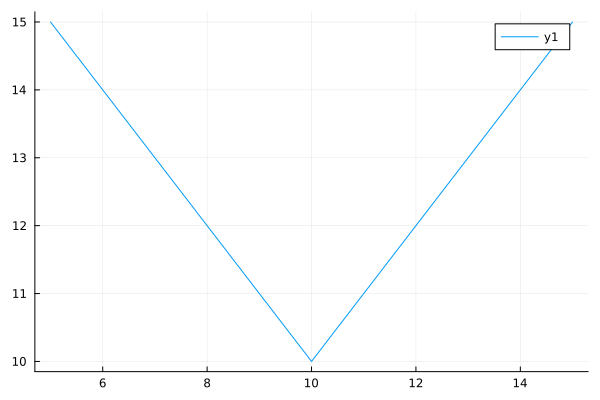

In [55]:
@time plot([15, 10, 5], [15, 10, 15])

In [56]:
import RecipesBase: plot

LoadError: ArgumentError: Package RecipesBase not found in current path:
- Run `import Pkg; Pkg.add("RecipesBase")` to install the RecipesBase package.


In [57]:
scatter(x::Vector{<:Number}, y::Vector{<:Number}, width::Int64 = 500,
height::Int64 = 500, margin::Pair{Int64, Int64} = 0 => 0; divisions::Int64 = 4,
    title = "", args ...) = begin
    con::Context = Context(width, height, margin)
    group!(con, "plotbase") do g::Group
        axes!(con)
        grid!(con, divisions)
    end
    group!(con, "points") do g::Group
        points!(con, x, y)
    end
    con
end

scatter (generic function with 4 methods)

In [58]:
d = scatter([5, 10, 15], [5, 10, 15])

Context(Component{:svg}("window", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("window", "svg", Dict{Any, Any}(:children => Servable[Component{:line}("r9F0YEZi", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("r9F0YEZi", "line", Dict{Any, Any}(:children => Servable[], :y1 => 500, :x2 => 500, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 500, :x2 => 500, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[], "line"), Component{:line}("bRBVqJss", Toolips.var"#f#80"{String, String, Dict{Any, Any}, Vector{Servable}}("bRBVqJss", "line", Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 0, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500, :x1 => 0), Servable[]), Dict{Any, Any}(:children => Servable[], :y1 => 0, :x2 => 0, "style" => "'fill: none;stroke: black;stroke-width: 4;'", :y2 => 500,

In [59]:
import Base: display, show

In [60]:
function display(m::MIME{Symbol("text/html")}, con::AbstractContext)
    display(MIME"text/html", con.window)
end

display (generic function with 36 methods)

In [61]:
function show(io::IO, con::AbstractContext)
    display(MIME"text/html"(), con.window)
end

show (generic function with 400 methods)

In [62]:
d.layers

Dict{String, UnitRange{Int64}} with 15 entries:
  "cJL4L8DC" => 1:1
  "points"   => 15:15
  "AcnpBD2J" => 3:3
  "eiagefAO" => 6:6
  "5ccuVoah" => 12:12
  "plotbase" => 11:11
  "bU8EJfXv" => 4:4
  "1f93PQL9" => 8:8
  "uOplfvjA" => 2:2
  "Wkfqqhoo" => 5:5
  "bCqJ1nle" => 13:13
  "6JuCfCcw" => 10:10
  "ptFNGgEe" => 9:9
  "8QTo6Z96" => 7:7
  "pS1dD5VM" => 14:14